# Chapter 13: Convolutional Neural Networks

Convolutional neural networks (CNNs) are a class of artificial neural networks that came about from studying the visual cortex. They have shown to be incredibly effective neural network architectures for image classifications and _natural language processing_ (NLP).

## The Architecture of the Visual Cortex

David H. Hubel and Torsten Wiesel performed experiments on cats<sup>[[1]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1357023/pdf/jphysiol01301-0020.pdf)[[2]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1363130/pdf/jphysiol01298-0128.pdf)</sup> which showed that many neurons in the visual cortex only react to other neurons in a small _local receptive field_ of neurons. Some neurons only react to simple patterns whereas some neurons have larger receptive fields which may overlap with others and react to more complex patterns. This allows the brain to recognize complex visual patterns.

In 1998, Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner published a [paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) introduced _LeNet-5_ architecture which is used to recognize handwritten digits. CNNs use fully connected hidden layers and the sigmoid activation function, but it also uses new components called _convolutional layers_ and _pooling layers_.

## Convolutional Layer

The fundamental building block of the CNN is called the _convolutional layer_. The convolutional layer is group of 2D layers of neurons where each neuron is only connected to neurons in the previous convolutional layer in its local receptive field, i.e. a neuron at row $i$ and column $j$ in a CNN is connected to $i + f_h - 1$ rows and $j + f_w - 1$ columns of the previous layer where $f_h$ and $f_w$ are the height and width of the local receptive field respectively.

To prevent the higher layer from being smaller than the lower layer, extra neurons whose weights are zero are added to the higher layer along the edges. This is called _zero padding_.

It is possible to connect a larger input layer to a smaller layer by spacing out the receptive fields. The distance between two consecutive receptive fields is called the stride. A neuron at row $i$ and column $j$ would be connected to neurons in rows $i \times s_h$ to $i \times s_h + f_h - 1$ and columns $j \times s_w$ to $j\times s_w + f_w - 1$.

### Filters

A neuron's weights can be represented as a small image the size of the local receptive field called a _filter_. A layer of neurons using the same filter is called a _feature map_.

### Stacking Feature Maps

A convolutional layer is a stack of individual feature maps. Each neuron in the convolutional layer receives inputs in its local receptive field from every feature map in the previous convolutional layer. The output of the neuron located in row $i$, column $j$ in feature map $k$ of convolutional layer $l$, we have

$$ z_{i,\,j,\,k} = b_k + \sum\limits_{u\,=\,0}^{f_h-1} \; \sum\limits_{v\,=\,0}^{f_w-1} \; \sum\limits_{k'\,=\,0}^{f_{n'}-1} x_{i',\,j',\,k'} \cdot w_{u,\,v,\,k',k} \;\; \text{with} \;\; \left\{ \begin{matrix} i' = i\times s_h + u \\ j' = j\times s_w + v \end{matrix} \right. $$

- $z_{i,\,j,\,k}$ is the output of the neuron located in row $i$, column $j$ of feature map $k$ in convolutional layer $l$.

- $s_h$ and $s_w$ are the vertical and horizontal strides, $f_h$ and $f_w$ is the height and width of the receptive field, and $f_{n'}$ is the number of feature maps in convolutional layer $l-1$.

- $x_{i',\,j',\,k'}$ is the output of the neuron located in layer $l-1$, row $i'$, column $j'$, and feature map $k'$ (or channel $k'$ if the previous layer is the input layer).

- $b_k$ is the bias term for feature map $k$ in layer $l$. It can be thought of as the "brightness" of the feature map.

- $w_{u,\,v,\,k',k}$ is the connection weight between any neuron in feature map $k$ of the layer $l$ and its input located at row $u$, column $v$ (relative to the neuron's receptive field) and feature map $k'$, i.e. the feature map's _filter_.

### TensorFlow Implementation

In TensorFlow, each image is represented with a 3D tensor of shape `[height, width, channels]`. A mini-batch is a 4D tensor of shape `[mini-batch size, height, width, channels]`. The weights of a convolutional layer are another 4D tensor of shape $[f_h,f_w,f_{n'},f_n]$ and the bias term is a 1D tensor of shape $[f_n]$. Below is an example of loading two sample images and creates two $7\times7$ filters which it applies using TensorFlow's `tf.nn.conv2d()` function.

In [0]:
# Downloading the sample images.

from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")

In [0]:
# Plotting the sample images.

import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

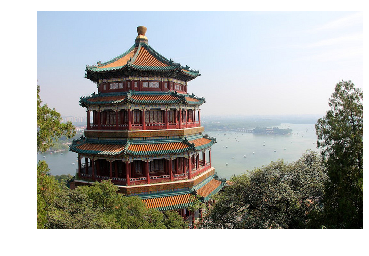

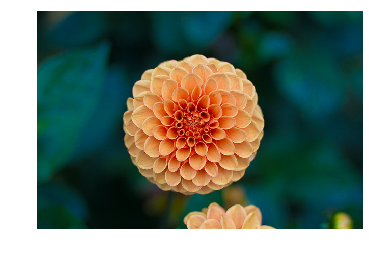

In [0]:
plot_image(china)
plt.show()
plot_image(flower)
plt.show()

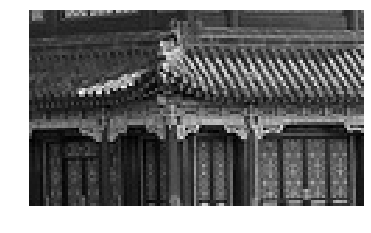

In [0]:
# Plotting a section of the China image.

import numpy as np

image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
plot_image(image_grayscale)

In [0]:
# Reshaping the image into a 4D tensor for tf.nn.

images = image_grayscale.reshape(1, height, width, 1)

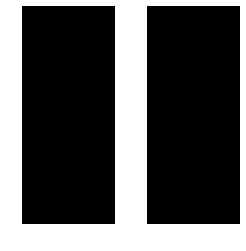

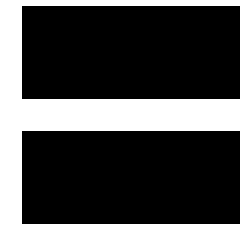

In [0]:
# Defining the filters for each feature map in the convolutional layer.

fmap = np.zeros((7, 7, 1, 2), dtype=np.float32)
fmap[:,3,0,0] = 1.0
fmap[3,:,0,1] = 1.0

plot_image(fmap[:,:,0,0])
plt.show()
plot_image(fmap[:,:,0,1])
plt.show()

In [0]:
# Creating a convolutional layer with TensorFlow.

import tensorflow as tf

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding='SAME')

In [0]:
# Applying the convolutional layer to the image.

with tf.Session() as sess:
  output = convolution.eval(feed_dict={X: images})

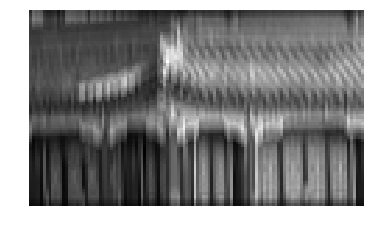

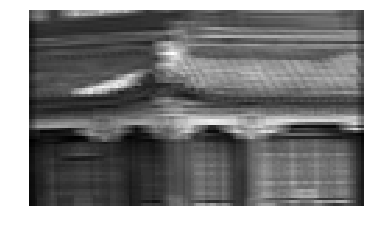

In [0]:
# Plotting the output of the convolutional layer.

plot_image(output[0,:,:,0])
plt.show()
plot_image(output[0,:,:,1])
plt.show()

In [0]:
# Below is an example of using convolutional layers using the entire sample
# images as inputs

tf.reset_default_graph()

dataset = np.array([china, flower], dtype=np.float32)
width, height, channels = china.shape

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:,3,:,0] = 1.0  # vertical line
filters[3,:,:,1] = 1.0 # horizontal line

X = tf.placeholder(tf.float32, shape=(None, width, height, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding='SAME')

with tf.Session() as sess:
  output = convolution.eval(feed_dict={X: dataset})

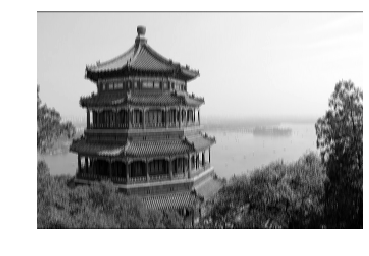

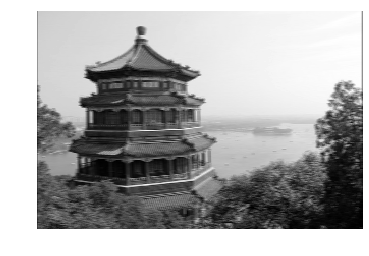

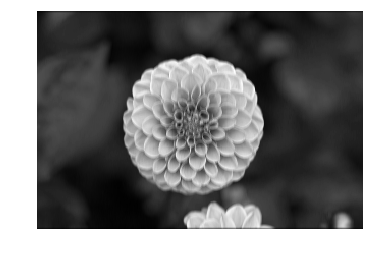

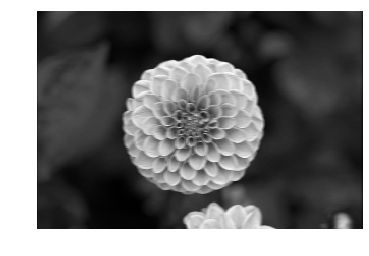

In [0]:
plot_image(output[0,:,:,0])
plt.show()
plot_image(output[0,:,:,1])
plt.show()
plot_image(output[1,:,:,0])
plt.show()
plot_image(output[1,:,:,1])
plt.show()

### VALID vs SAME padding

The `padding` hyperparameter can be one of two values: `"VALID"` or `"SAME"`.

- If `padding` is set to `"VALID"` then the layer will not do zero padding, and ignore the outermost neurons of the input layer.

- If `padding` is set to `"SAME"` then the model uses zero padding. It tries its best to keep the outputs in the center of the 2D grid of neurons.

In [0]:
# A convolutional layer using the tf.layers.conv2d

tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, width, height, channels))
conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2, 2],
                        padding='SAME')
init = tf.global_variables_initializer()

with tf.Session() as sess:
  init.run()
  output = conv.eval(feed_dict={X: dataset})

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.


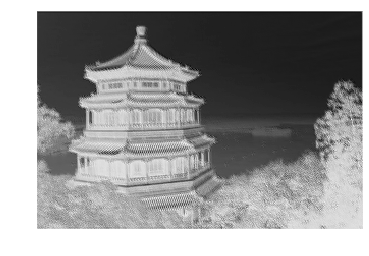

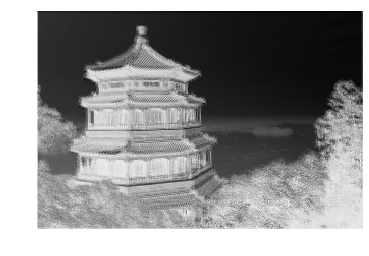

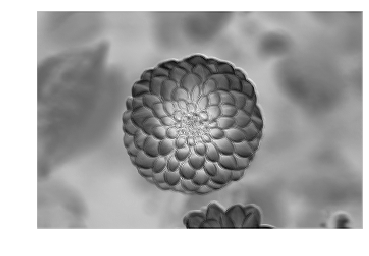

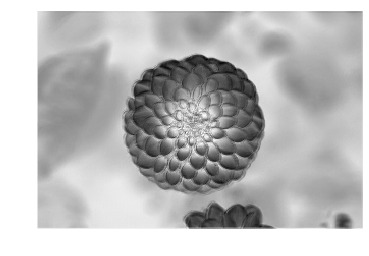

In [0]:
plot_image(output[0,:,:,0])
plt.show()
plot_image(output[0,:,:,1])
plt.show()
plot_image(output[1,:,:,0])
plt.show()
plot_image(output[1,:,:,1])
plt.show()

### Memory Requirements

One problem with CNNs is that they take up a lot of memory. For example a convolutional layer that applies a 5 $\times$ 5 filter outputting 200 feature maps of size 150 $\times$ 100 which stores its filter weights as 32-bit floats would require 11.4 MB of RAM _per training instance_. This is the space requirement alone. Training 100 instances over 1 GB of RAM.

## Pooling Layer

Pooling layers are relatively simple compared to convolutional layers. A pooling layer applies the values of neurons from a convolutional layer and aggregates them using either by computing the maximum or the mean. Like neurons in convolutional layers, neurons in pooling layers have local receptive fields.

TensorFlow implements both a max and mean pooling layer using `tf.nn.max_pool()` or `tf.nn.avg_pool()`. The local receptive field is given by the `ksize` parameter, a 4D tensor along the four dimensions of the input. `ksize[0]` must always be 1 since TensorFlow does not support cross instsnce pooling. It also does not support doing _both_ cross-channel pooling and pooling across multiple neurons in its input layer.

Below is an example of using TensorFlow's pooling layer:

In [0]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, width, height, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],
                          padding='VALID')

with tf.Session() as sess:
  output = max_pool.eval(feed_dict={X: dataset})

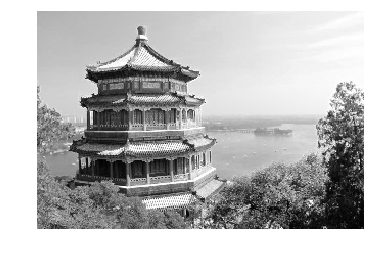

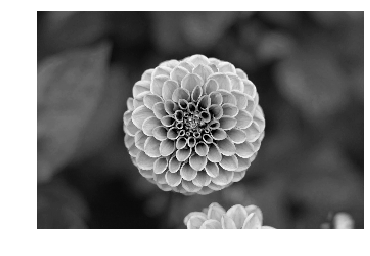

In [0]:
plot_image(output[0,:,:,0])
plt.show()
plot_image(output[1,:,:,1])
plt.show()

## CNN Architectures

A convolutional neural network's architecture is generally composed of:

1. A series of convolutional layers each layer applies a ReLU activation function.
2. A series of pooling layers to reduce the size of the output.
3. Another series of convolutional layers also using ReLU.
4. A series of pooling layers to further reduce the size of the output.
5. A fully connected DNN using the ReLU activation function.
6. A softmax layer which computes the model's class probabilities.

Variants of this basic architecture have also been developed which perform very well. Some of the notable architectures are the previous winners of the [ILSVRC ImageNet challenge](http://image-net.org). Below are some examples of previous winners of the competition.

### Other Visual Tasks

Another visual task that CNNs perform well in is object detection and localization. Maxime Oquab et al.'s [2015 paper](https://leon.bottou.org/publications/pdf/cvpr-2015.pdf) discusses a CNN which outputs a heatmap for each object class.

Russel Stewart et al.'s [2015 paper](https://arxiv.org/pdf/1506.04878.pdf) discusses combining a CNN for detecting fsaces and a recurrent network (see Chapter 14) to output a sequence of bounding boxes around them.

Evan Shelhamer et al.'s [2016 paper](https://arxiv.org/pdf/1605.06211v1.pdf) discusses image segmentation, where the model outputs a grid where each cell corresponds to the class that the input pixel belongs to.

### LeNet-5

The most widely known CNN architecture is LeNet-5 developed by Yann LeCun in 1998. It is composed of the following layers:

<table>
<thead>
<td> Label </td> <td> Type </td> <td> Maps </td> <td> Size </td>
<td> Kernel Size </td> <td> Stride </td> <td> Activation </td>
</thead>
<tr>
<td> Out </td> <td> Fully Connected </td> <td> - </td> <td> 10 </td>
<td> - </td> <td> - </td> <td> RBF </td>
</tr>
<tr>
<td> F6 </td> <td> Fully Connected </td> <td> - </td> <td> 84 </td>
<td> - </td> <td> - </td> <td> tanh </td>
</tr>
<tr>
<td> C5 </td> <td> Convolution </td> <td> 120 </td> <td> 1 $\times$ 1 </td>
<td> 5 $\times$ 5 </td> <td> 1 </td> <td> tanh </td>
</tr>
<tr>
<td> S4 </td> <td> Avg Pooling </td> <td> 16 </td> <td> 5 $\times$ 5 </td>
<td> 2 $\times$ 2 </td> <td> 2 </td> <td> tanh </td>
</tr>
<tr>
<td> C3 </td> <td> Convolution </td> <td> 16 </td> <td> 10 $\times$ 10 </td>
<td> 5 $\times$ 5 </td> <td> 1 </td> <td> tanh </td>
</tr>
<tr>
<td> S2 </td> <td> Avg Pooling </td> <td> 6 </td> <td> 14 $\times$ 14 </td>
<td> 2 $\times$ 2 </td> <td> 2 </td> <td> tanh </td>
</tr>
<tr>
<td> C1 </td> <td> Convolution </td> <td> 6 </td> <td> 28 $\times$ 28 </td>
<td> 5 $\times$ 5 </td> <td> 1 </td> <td> tanh </td>
</tr>
<tr>
<td> In </td> <td> Input </td> <td> 1 </td> <td> 32 $\times$ 32 </td>
<td> - </td> <td> - </td> <td> - </td>
</tr>
</table>

There are also additional details of the model:

- MNIST images are 28 $\times$ 28 pixels but they are zero-padded to 32 $\times$ 32 pixels and normalized. No other layer uses padding.

- The average poooling layers multiply the result by a learnable scalar and bias term.

- Most neurons in C3 maps are connected to neurons in only 3 out of 4 S2 maps. More details are in the original paper.

- The output layer computes the square of the Euclidean distance between the input vector and the weight vector. Each output neuron measures how much the image belongs to that particular digit class. The cross entropy cost function is used as well.

You can read more on Yann LeCun's [website](http://yann.lecun.com/).

### AlexNet

The _AlexNet_ CNN architecture, devleoped by Alex Krizhenvsky and discussed in this [paper](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf), won the 2012 ILSVRC challenge. Below is an overview of the architecture:

<table>
<thead>
<td> Label </td> <td> Type </td> <td> Maps </td> <td> Size </td>
<td> Kernel Size </td> <td> Stride </td> <td> Padding </td>
<td> Activation </td>
</thead>
<tr>
<td> Out </td> <td> Fully Connected </td> <td> - </td> <td> 1,000 </td>
<td> - </td> <td> - </td> <td> - </td>
<td> Softmax </td>
</tr>
<tr>
<td> F9 </td> <td> Fully Connected </td> <td> - </td> <td> 4,096 </td>
<td> - </td> <td> - </td> <td> - </td>
<td> ReLU </td>
</tr>
<tr>
<td> F8 </td> <td> Fully Connected </td> <td> - </td> <td> 4,096 </td>
<td> - </td> <td> - </td> <td> - </td>
<td> ReLU </td>
</tr>
<tr>
<td> C7 </td> <td> Convolution </td> <td> 256 </td> <td> 13 $\times$ 13 </td>
<td> 3 $\times$ 3 </td> <td> 1 </td> <td> SAME </td>
<td> ReLU </td>
</tr>
<tr>
<td> C6 </td> <td> Convolution </td> <td> 384 </td> <td> 13 $\times$ 13 </td>
<td> 3 $\times$ 3 </td> <td> 1 </td> <td> SAME </td>
<td> ReLU </td>
</tr>
<tr>
<td> C5 </td> <td> Convolution </td> <td> 384 </td> <td> 13 $\times$ 13 </td>
<td> 3 $\times$ 3 </td> <td> 1 </td> <td> SAME </td>
<td> ReLU </td>
</tr>
<tr>
<td> S4 </td> <td> Max Pooling </td> <td> 256 </td> <td> 13 $\times$ 13 </td>
<td> 3 $\times$ 3 </td> <td> 2 </td> <td> VALID </td>
<td> - </td>
</tr>
<tr>
<td> C3 </td> <td> Convolution </td> <td> 256 </td> <td> 27 $\times$ 27 </td>
<td> 5 $\times$ 5 </td> <td> 1 </td> <td> SAME </td>
<td> ReLU </td>
</tr>
<tr>
<td> S2 </td> <td> Max Pooling </td> <td> 96 </td> <td> 27 $\times$ 27 </td>
<td> 3 $\times$ 3 </td> <td> 2 </td> <td> VALID </td>
<td> - </td>
</tr>
<tr>
<td> C1 </td> <td> Convolution </td> <td> 96 </td> <td> 55 $\times$ 55 </td>
<td> 11 $\times$ 11 </td> <td> 4 </td> <td> SAME </td>
<td> ReLU </td>
</tr>
<tr>
<td> In </td> <td> Input </td> <td> 3 (RGB) </td> <td> 224 $\times$ 224 </td>
<td> - </td> <td> - </td> <td> - </td> <td> - </td>
</tr>
</table>

To provide regularization, the authors used a 50% dropout during training the outputs of F8 and F9. They also did data augmentation by translating, flipping horizontally, and adjusting the brightness of the iamges in the training data.

AlexNet also uses a competitive normalization step after the ReLU activation of layers C1 and C3 called _local response normalization_. The idea is that neurons that most strongly activate will inhibit neurons at the same location but in neighboring feature maps. This competitive activation has been observed in biological neurons as well. The equation below shows how to apply LRN:

$$ b_i = a_i \left( k + \alpha \sum\limits_{j\,=\,j_\text{low}}^{j_\text{high}} a_j^{\,2} \right)^{-\beta}
\;\; \text{with} \;\;
\left\{ \begin{matrix}
j_\text{high} = \min\left( i + \frac{r}{2}, f_n - 1 \right) \\
j_\text{low} = \max\left(  0, i - \frac{r}{2} \right)
\end{matrix} \right. $$

- $b_i$ is the normalized output of the neuron in feature map $i$, at some row $u$ and column $v$ ($u$ and $v$ are not needed in this equation).

- $a_i$ is the activation of that neuron after the ReLU step.

- $k$, $\alpha$, $\beta$, and $r$ are hyperparameters, $k$ is called the _bias_, and $r$ is called the _depth radius_.

- %f_n$ is the number of feature maps in the preceeding convolutional layer.

For example, if $r = 2$ then a neuron with strong activation will inhibit the layer above and below the feature map. In AlexNet, the hyperparameters are set as followed:

- $r = 2$

- $\alpha = 2 \times 10^{-5}$

- $\beta = 0.75$

- $k = 1$

LRN can be implemented with `tf.nn.local_response_normalization()`.

### GoogLeNet

The [GoogLeNet architecture](http://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf) was developed by Christian Szegedy et al. from Google Research. The network is much deeper than AlexNet but actually uses less parameters using subnetworks called _inception modules_. The notation 2$\times$2 + 1(S) means that the convolutional layer has a 2$\times$2 kernel, a stride of 1, and SAME padding.

Below is a diagram of an inception module:

<img src="https://i.imgur.com/PcyZphr.png" width=600>

The layer is designed to be a _bottleneck layer_, a layer that outputs many fewer features maps than its input. Also pairs of convolutional layers, $[1\times1,\,3\times3]$ and $[1\times1,\,5\times5]$, act as single, more powerful convolutional layer which is similar to sweeping the whole input with a fully connected network. Each convolutional layers' output has the same height and width, so the layer uses a depth concat of all the outputs at the last step.

Below is the structure of GoogLeNet:

<img src="https://i.imgur.com/6lgiHDJ.png" width=600>

where each cell with a horizontal border are inception modules. Below is more detail on the network:

- The first two layers divide the height and width by 4 to reduce the computational load.

- The local response normalization (LRN) ensures the previous layer learns a variety of features.

- The two convolutional layers that follow act as a bottleneck layer.

- Another LRN layer for the same purpose as before.

- A max pooling layer divides the width and height by 2.

- Then nine inception modules with some max pooling layers to speed up computation.

- Finally an average pooling layer layer which outputs 1$\times$1 feature maps which forces the previous layers to produce feature maps which are confidence maps of each class. This technique, called _global average pooling_ eliminates the need for a fully connected neural network at the end of the CNN.

- Finally there is a 40% dropout to prevent overfitting and then 1000 output layers which use softmax activation.



### ResNet

The winner of the ILSVRC 2015 competition was the [_Residual Network_](https://arxiv.org/pdf/1512.03385v1.pdf) (or _ResNet_) developed by Kaiming He at al. which uses 152 convolutional layers!

The key insight of ResNet is to use _skip connections_ (also called _shortcut connections_) which feed the signal from the inputs across the network some of the convolutional layers. The input signal is also fed to the output layer so that instead of the model learning to match a pattern $h(\mathbf{x})$ whereas this architecture is trying to optimize for $h(\mathbf{x}) - \mathbf{x}$. Since the model initializes its weights at or close to zero, it starts out originally computing close to the identity function. This speeds up training the model if the function you are training to fit is similar to the identity function, which is normally the case in machine learning.

The deep residual network is made up of _residual units_, i.e. small neural network with a skip connection.

The architecture of ResNet is actually very simple. It starts and ends just like GoogLeNet, 2 convolutional layers with a max pool to reduce the size of the input and it ends with fully connected layer with 1000 units (but without dropout). Between these it trains a deep stack of residual units of 2 convolutional layers with batch normalization (BN) and ReLU activation. Each layer uses 3$\times$3 kernels, a stride of 1, and uses SAME padding.

Each group of residual units eventually doubles the number of feature maps, but reduces the height and width of the input by 2 by feeding through a convolutional layer with a stride of 2 and a max pooling layer. In order for this to be compatible with the skip connections, each skip connection goes through a convolutional layer with a 1$\times$1 kernel and a stride of 2 to reduce the height and width of the input signal by 2.

ResNet-34 is a version of ResNet with only 34 layers (only counting convolutional layers and the fully connected layer) which contains 3 residual units that output 64 feature maps, 4 RUs that output 128 maps, 6 RUs which output 256 maps, and 3 RUs with 512 maps.

There are also deeper ResNet models like ResNet-152 which use different RUs in the network. Other interesting architectures include [VGGNet](https://arxiv.org/pdf/1409.1556.pdf) and [Inception-v4](https://arxiv.org/pdf/1602.07261v2.pdf) (which merges the idea of GoogLeNet and ResNet).

## TensorFlow Convolution Operations

TensorFlow offers the following types of convolutional layers:

- `tf.layers.conv1d()` creates a convolutional layer for 1D inputs which is useful for NLP.

- `tf.layers.conv3d()` creates a convolutional layer for a 3D input such as PET scans.

- `tf.nn.atrous_conv2d()` creates an _atrous convolutional layer_ which is equivalent to a regular convolutional layer except it dilates the filters by inserting rows and columns of zeros. This allows the layer to use larger receptive fields at no extra computational cost and adding no extra parameters.

- `tf.layers.conv2d_transpose()` creates a _transpose convolutional layer_, sometimes called a _deconvolutional layer_. It does so by inserting zeros between inputs, which allows you to simulate using a fractional stride. This lets you actually expand the output signal to have a larger height and width than the input signal. This is useful if the output of the CNN is images the same size as the input images.

- `tf.nn.depthwise_conv2d()` creates a _depthwise convolutional layer_ that applies every filter to every individual input channel independently.

- `tf.layers.separable_conv2d()`creates a _separable convolutional layer_ that first acts like a depthwise convolutional layer then applies a convolutional layer with a 1$\times$1 kernel to the resulting feature maps.

## Exercises

### 1. What are the advantages of a CNN over a fully connected DNN for image classification?

A CNN requires fewer parameters since each neuron in a CNN is not connected to every single neuron in the previous layer. Instead CNNs also only rely on their local receptive field.

Also CNNs learn the filters for each feature map. This allows the CNN to learn complex visual patterns, like an actual brain's visual visual cortex.

### 2. Consider a CNN composed of 3 convolutional layers, each with 3 $\times$ 3 kernels, a stride of 2, and SAME padding. The lowest layer outputs 100 feature maps, the middle outputs 200, and the top one outputs 400. The input images are RGB images of 200 $\times$ 300 pixels. What is the total number of parameters in the CNN? If we are using 32-bit floats, at least how much RAM will the network require when making a prediction for a single instance? What about when training on a mini-batch of 50 images?

Since the first convolutional layer uses a 3 $\times$ 3 kernel with 100 feature maps with 3 input channels, it needs 2,800 parameters, the last 100 being the bias terms.

The second layer also uses a 3 $\times$ 3 kernel with 200 feature maps with 100 input channels, so it needs 180,200 parameters.

The third layer uses a 3 $\times$ 3 kernel with 300 feature maps with 200 input channels, so it needs 540,300 parameters.

The entire network uses 2,800 + 180,200 + 540,300 = 723,300 parameters.

If it uses 32 bit floats to store the parameters, for making a prediction for a single instance it only needs at most two consecutive layers of memory. Each layer requires:

- (200 $\times$ 300) $\times$ 3 $\times$ 32 = 5,760,000 bits
- (100 $\times$ 150) $\times$ 100 $\times$ 32 = 48,000,000 bits
- (50 $\times$ 75) $\times$ 200 $\times$ 32 = 24,000,000 bits
- (25 $\times$ 33) $\times$ 300 $\times$ 32 = 7,920,000 bits

Prediction needs at least enough RAM for the two consecutive layers which take the most memory. In this case that is 48,000,000 + 24,000,000 = 72,000,000 bits or 9 MB.

Training requires that the model have enough memory for each layer for each instance in the mini-batch. In this case that is

$$ 50 \times (5,760,000 + 48,000,000 + 24,000,000 + 7,920,000) = 4,284,000,000 \,\text{bits} $$

or 535.5 MB.

### 3. If your GPU runs out of memory while training a CNN, what are five things you could try to solve the problem?

1. You can try using a smaller mini-batch size during training.

2. You can distribute the training of the model over multiple machines. Though this may slow down training due to added network latency.

3. You can try adding a pooling layer with a stride greater than 1 between each layer with VALID padding to reduce the size of the output.

4. You can increase the stride of the convolutional neural networks in order to reduce the size of their output.

5. You can reduce the number of feature maps used in each convolutional layer of the network.

### 4. Why would you want to add a max pooling layer rather than a convolutional layer with the same stride?

A max pooling layer reduces the height and width of the input with fewer parameters than a convolutional layer since it does not use feature maps.

### 5. When would you want to add a _local response normalization_ layer?

A local response normalization layer is a competitive normalization technique which dampens neurons in neighboring feature maps at the same location of neurosn that are strongly activated. This forces the feature maps in a convolutional layer to learn a variety of different patterns from the training set.

### 6. Can you name the main innovations in AlexNet, compared to LeNet-5? What are the main innovations in GoogLeNet and ResNet?

AlexNet's main innovation was the introduction of local response normalization layers. It also used a deeper stack of convolutional layers than LeNet-5.

GoogLeNet's main innovation was the introduction of inception modules into the neural network, which reduce the height and width of the input for layers deeper in the network and also acts as a powerful convolutional layer capable of recongizing complex features.

ReNet's main innovation was the use of skip connections and residual units. It also added a skip connection to the output layer to speed up convergence. ResNet also used a very deep stack of convolutional layers which is made up of residual units.

### 7. Build your own CNN and try to achieve the highest possible accuracy on MNIST.

See `MNIST.ipynb` for the solution to this exercise.

### 8. Classifying large images using Inception v3.

See `Inception.ipynb` for the solution to this exercise.